<a href="https://colab.research.google.com/github/Koush98/Toyota_Price_Prediction/blob/main/Toyota_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
url="https://raw.githubusercontent.com/Koush98/Toyota_Price_Prediction/main/clean_car.csv"

df=pd.read_csv(url, encoding='unicode_escape',on_bad_lines='skip')

In [8]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,60.0,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,63634.0,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,60.0,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,63634.0,Petrol,86.0,1.0,0,1300,3,1015


In [9]:
c=df.columns
c

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

Linear Regression - Mean Squared Error: 2591499.2681352603, R-squared: 0.8057752919204345


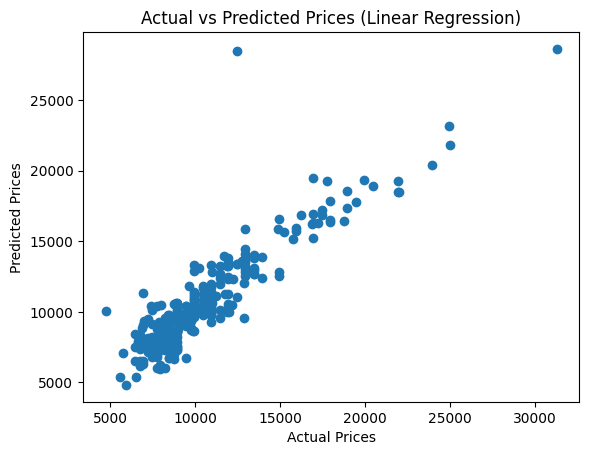

Decision Tree - Mean Squared Error: 2892129.636284722, R-squared: 0.783243992679244


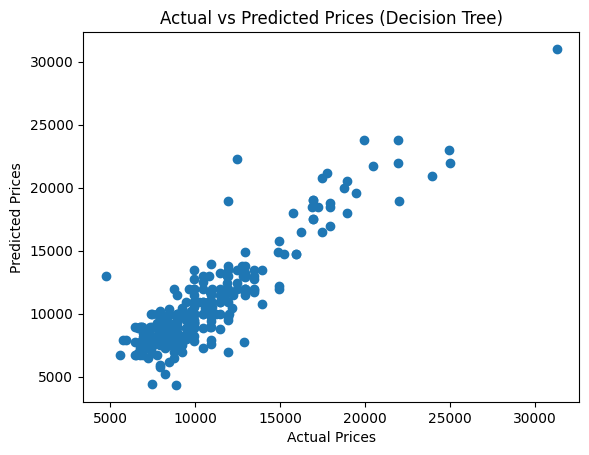

Random Forest - Mean Squared Error: 1571517.675193171, R-squared: 0.8822196998242254


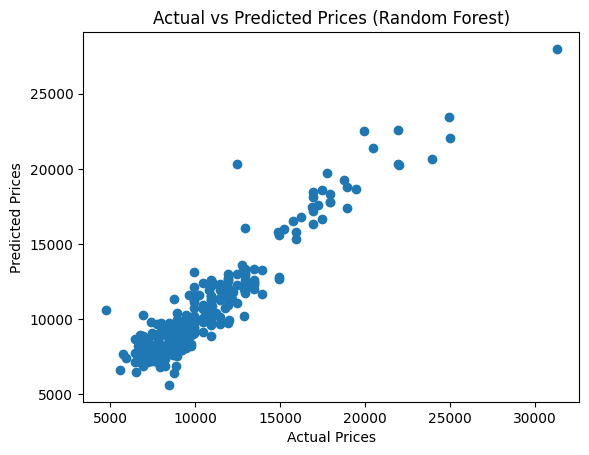

Gradient Boosting - Mean Squared Error: 1623379.006476173, R-squared: 0.8783328563846335


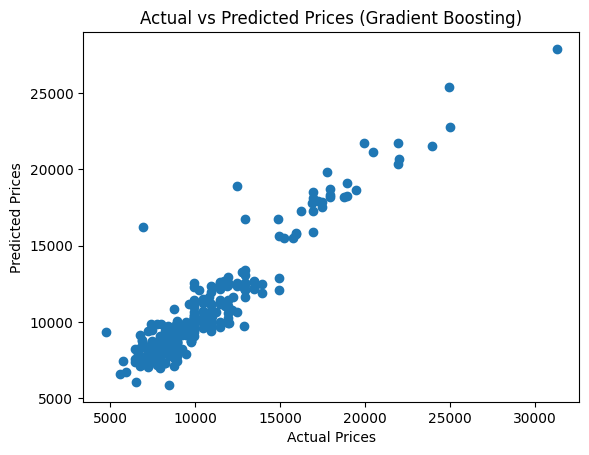

Best model saved as best_model.pkl

Summary of Model Performance:
Linear Regression - MSE: 2591499.2681352603, R2: 0.8057752919204345
Decision Tree - MSE: 2892129.636284722, R2: 0.783243992679244
Random Forest - MSE: 1571517.675193171, R2: 0.8822196998242254
Gradient Boosting - MSE: 1623379.006476173, R2: 0.8783328563846335


In [10]:
# model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


# Preprocessing

# Assuming 'Price' is the target variable and others are features
X = df.drop(['Price','MetColor','Automatic','CC','Doors'],axis=1)
y = df['Price']

# Encode categorical variables if any
# Example: Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
best_model = None
best_r2 = -float('inf')

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f'{model_name} - Mean Squared Error: {mse}, R-squared: {r2}')

    # Check for the best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model

    # Plotting the results
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices ({model_name})')
    plt.show()

# Save the best model to a .pkl file
joblib_file = "best_model.pkl"
joblib.dump(best_model, joblib_file)
print(f'Best model saved as {joblib_file}')

# Print summary of results
print("\nSummary of Model Performance:")
for model_name, metrics in results.items():
    print(f'{model_name} - MSE: {metrics["MSE"]}, R2: {metrics["R2"]}')

In [11]:
from google.colab import files
files.download('best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('best_model.pkl')

# Prepare the new data
new_data = pd.DataFrame({
    'Age': [35],
    'KM': [10000],
    'FuelType': ['Petrol'],
    'HP': [100],
    'Weight': [1200],
})

# Assuming you have already applied preprocessing steps like converting categorical variables to dummy variables
# Example: Convert categorical columns to dummy variables
new_data = pd.get_dummies(new_data, drop_first=True)

# Align columns with the model's expected input format
model_columns = model.feature_names_in_
new_data = new_data.reindex(columns=model_columns, fill_value=0)

# Make predictions
predictions = model.predict(new_data)

# Print or save the predictions
print("Predicted Price:", predictions[0])

Predicted Price: 14174.0
